In [1]:
import pandas as pd

# Dataset Information
### This dataset contains the data of 10 cars in the CARLA simulation environment, with the features as shown below.

In [69]:
df = pd.read_csv('vehicle_data.csv')

In [70]:
df.head()

,timestamp,vehicle_id,gear,throttle,speed,acceleration,max_rpm,gear_ratio,wheel_radius,engine_rpm,inclination,tyre_pressure,odometer,fuel_consumed,ignition_status,engine_oil_life,new_battery_percent
0,1.708225e+09,0,0,0.85,1.061667,25.723619,6300.0,3.450,0.33,30.737318,0.068042,"(0, 0, 0, 0)",0.000000,0.000000e+00,True,100.000000,99.998069
1,1.708225e+09,1,0,0.85,0.816886,28.389420,4700.0,3.769,0.34,22.954825,0.000000,"(0, 0, 0, 0)",0.000000,0.000000e+00,True,100.000000,99.997473
2,1.708225e+09,0,0,0.85,0.274378,0.511369,6300.0,3.450,0.33,7.943773,0.136481,"(0, 0, 0, 0)",0.029130,5.490478e-06,True,99.999999,99.996138
3,1.708225e+09,1,0,0.85,0.239636,0.081476,4700.0,3.769,0.34,6.733879,0.000000,"(0, 0, 0, 0)",0.006514,4.736946e-07,True,100.000000,99.994946
4,1.708225e+09,0,0,0.85,0.076758,0.820615,6300.0,3.450,0.33,2.222298,0.082611,"(0, 0, 0, 0)",0.062866,1.507606e-05,True,99.999999,99.994207


In [71]:
df = df[df["vehicle_id"] == 0]

In [72]:
df.head()

,timestamp,vehicle_id,gear,throttle,speed,acceleration,max_rpm,gear_ratio,wheel_radius,engine_rpm,inclination,tyre_pressure,odometer,fuel_consumed,ignition_status,engine_oil_life,new_battery_percent
0,1.708225e+09,0,0,0.85,1.061667,25.723619,6300.0,3.45,0.33,30.737318,0.068042,"(0, 0, 0, 0)",0.000000,0.000000,True,100.000000,99.998069
2,1.708225e+09,0,0,0.85,0.274378,0.511369,6300.0,3.45,0.33,7.943773,0.136481,"(0, 0, 0, 0)",0.029130,0.000005,True,99.999999,99.996138
4,1.708225e+09,0,0,0.85,0.076758,0.820615,6300.0,3.45,0.33,2.222298,0.082611,"(0, 0, 0, 0)",0.062866,0.000015,True,99.999999,99.994207
6,1.708225e+09,0,1,0.85,1.681097,5.602935,6300.0,2.10,0.33,401.681974,0.610148,"(0, 0, 0, 0)",0.251549,0.000055,True,99.999994,99.992276
8,1.708225e+09,0,1,0.85,2.274781,2.170914,6300.0,2.10,0.33,543.537085,0.467403,"(0, 0, 0, 0)",0.658497,0.000090,True,99.999985,99.990345


In [73]:
X = df[["speed", "throttle", "acceleration", "max_rpm"]]

In [74]:
y = df["engine_rpm"]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfc = RandomForestRegressor(n_estimators=100)

In [30]:
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
predictions = rfc.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_absolute_error(y_test, predictions)    

12.054989043817429

In [34]:
import numpy as np

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [36]:
print("RMSE:", rmse)

RMSE: 50.46032649102318


In [37]:
print("Accuracy:",rfc.score(X_test, y_test))

Accuracy: 0.9907992779979479


# Conclusion
### We have trained a RandomForestRegressor to predict the engine RPM with 99% accuracy.

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
predictions = lr.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [49]:
print("RMSE:", rmse)

RMSE: 103.94452593015232


In [50]:
print("Accuracy:",lr.score(X_test, y_test))

Accuracy: 0.9609586306257747


In [51]:
import matplotlib.pyplot as plt

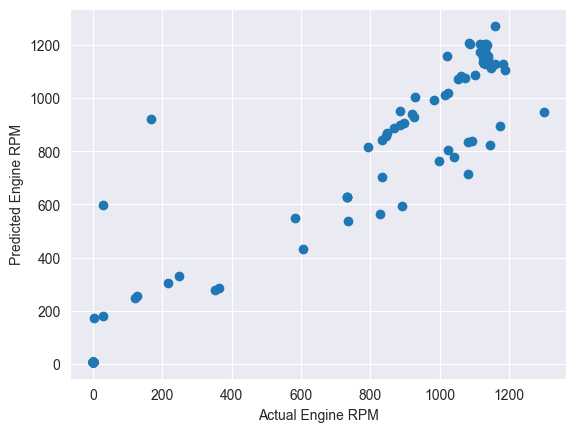

In [54]:
plt.xlabel("Actual Engine RPM")
plt.ylabel("Predicted Engine RPM")
plt.scatter(y_test, predictions)

# Conclusion
### We have trained a Linear Regression model to predict the engine RPM with 96% accuracy.

In [77]:
from sklearn.svm import SVR

In [91]:
svr_untuned = SVR()

In [92]:
svr_untuned.fit(X_train, y_train)

SVR()

In [93]:
predictions = svr_untuned.predict(X_test)

In [94]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [95]:
print("RMSE:", rmse)

RMSE: 643.9769317524685


In [96]:
print("Accuracy:",svr_untuned.score(X_test, y_test))

Accuracy: -0.44307566127317966


# Conclusion
### Without fine-tuning hyperparameters, we have 0% accuracy in the SVR model.

In [97]:
# grid search
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [99]:
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)

In [100]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.371 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.414 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.276 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.298 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.142 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.341 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.400 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.241 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.273 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.400 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [101]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [102]:
# fit the svr with best hyperparameters
svr = SVR(C=1000, gamma=0.1, kernel='rbf')

In [103]:
svr.fit(X_train, y_train)

SVR(C=1000, gamma=0.1)

In [104]:
predictions = svr.predict(X_test)

In [105]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [106]:
print("RMSE:", rmse)

RMSE: 57.89894474620742


In [107]:
print("Accuracy:",svr.score(X_test, y_test))

Accuracy: 0.988334864769754


# Conclusion
### We can conclude that after using Grid Search to optimize hyperparameters, Grid Search has improved the accuracy of the SVR model to 98%.